In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datagovindia import DataGovIndia
from fuzzywuzzy import process

In [2]:
# To Sync The Data From Source
MY_API_KEY = "579b464db66ec23bdd000001973d3e2bd75e45f07473b608e00799e8"

datagovin = DataGovIndia(MY_API_KEY) # Specify API key if not set as an environment variable
# datagovin.sync_metadata(7000 , 20)

In [3]:
## IMPORTANT FUNCTIONS ##

# searching available dataframes by name
def search_datagov(search_term , columns = ['title', 'description']):
    search_data = datagovin.search(search_term)
    # search_data = datagovin.search(search_term , search_fields=columns)

    if len(search_data) > 0:

        search_titles = search_data['title']
        search_id = search_data['resource_id']

        # for res in zip(search_id , search_titles):
        #     print(res)

        return zip(search_id , search_titles)
    
    return "Not Found"

# getting a resource by ID, onvert it to csv as well
def datagov_data(r_id , save=False , filename = ''):
    data = datagovin.get_data(r_id)
    if save:
        data.to_csv(filename, index=False)

    print(data.columns)
    print(data.sample(5))
    return data

# show the non-intersecting columns of the 2 dfs, little outdated
def show_unmerged(df1 , df2 , col):
    # Perform an outer merge
    merged_outer = pd.merge(df1, df2, how='outer', on=col, indicator=True)

    # Filter out rows that were included in the inner merge
    deleted_rows = merged_outer[merged_outer['_merge'] == 'left_only']

    # Print the deleted rows
    print(deleted_rows)


# get population of the state (Census 2011)
def get_state_pop(state):
    india_df = pd.read_excel("2011-IndiaState.xlsx")
    
    # print(india_df.columns)

    states_total = india_df[['Name','TRU','TOT_P']][india_df['TRU'] == 'Total']
    states_total = states_total[['Name' , 'TOT_P']]
    
    best_match = process.extract(state, states_total['Name'], limit=1)[0][0]
    print("Matched Value:" , best_match)
    
    return states_total[states_total['Name'] == best_match]['TOT_P'].astype('int32').tolist()[0]


# rename all states so they are identical and ready for merging
def standardize_states(state_col):
    s_states = []

    # Iterate over each state name in the 'state' column
    for state in state_col:
        # Apply the standardize_states function to the state name and append the result to the list
        state_name = get_state_name(state)
        s_states.append(state_name)

    return s_states


# helper for standardize_states
def get_state_name(state):
    india_df = pd.read_csv("C:\\Users\\Ojasva Saxena\\Desktop\\Personal\\Maps\\Lucknow\\Unorganised_Workers_e-Shram_byStateFeb24.csv") # using these values of states as base
    
    # print(india_df.columns)

    states_total = india_df[['state_ut']]

    states_total['state_ut'] = states_total['state_ut'].str.upper()
 
    best_match = process.extract(state.upper(), states_total['state_ut'], limit=1)[0][0]
    print("Matched Value:" , best_match)
    
    return best_match


In [16]:
# SEARCH DATASETS

result = search_datagov("Bathing Facility")

for x in result:
    print(x)

('d3df1a9b-33c1-4765-aa96-cf4d4b96e3d1', 'State/ UT-wise Households by Availability of Bathing Facility and type of Drainage Connectivity for waste water outlet -Urban (in reply to Unstarred Question for 10-08-2017) (From: Ministry of Housing and Urban Affairs )')
('a9937e44-d079-4b49-a54b-73242024f8f6', 'State/ UT-wise Scheduled Caste (SC) Households by Availability of Bathing Facility and type of Drainage Connectivity for waste water outlet -Urban (in reply to Unstarred Question for 10-08-2017) (From: Ministry of Housing and Urban Affairs )')
('1892c61d-a16f-46db-bcc3-d2b6f870c119', 'State/ UT-wise Scheduled Tribe (ST) Households by Availability of Bathing Facility and type of Drainage Connectivity for waste water outlet -Urban (in reply to Unstarred Question for 10-08-2017) (From: Ministry of Housing and Urban Affairs )')
('ddb842c9-2024-43a5-9746-621d7caf7e19', 'State/ UT-wise Slum Households by Availability of Bathing facility and type of Drainage Connectivity for waste Water outl

In [17]:
'''
('8a0b35ca-7df9-4d6f-8dae-3043ef67c592', 'State/ UT-wise Households By Availability of type of Latrine Facility -Urban (Excluding Institutional Households) (in reply to Unstarred Question for 10-08-2017) (From: Ministry of Housing and Urban Affairs )')

('d3df1a9b-33c1-4765-aa96-cf4d4b96e3d1', 'State/ UT-wise Households by Availability of Bathing Facility and type of Drainage Connectivity for waste water outlet -Urban (in reply to Unstarred Question for 10-08-2017) (From: Ministry of Housing and Urban Affairs )')

('a9937e44-d079-4b49-a54b-73242024f8f6', 'State/ UT-wise Scheduled Caste (SC) Households by Availability of Bathing Facility and type of Drainage Connectivity for waste water outlet -Urban (in reply to Unstarred Question for 10-08-2017) (From: Ministry of Housing and Urban Affairs )')

('1892c61d-a16f-46db-bcc3-d2b6f870c119', 'State/ UT-wise Scheduled Tribe (ST) Households by Availability of Bathing Facility and type of Drainage Connectivity for waste water outlet -Urban (in reply to Unstarred Question for 10-08-2017) (From: Ministry of Housing and Urban Affairs )')
'''
title_csv = "test4.csv"
data_mobiles = datagov_data("d3df1a9b-33c1-4765-aa96-cf4d4b96e3d1" , True , title_csv)

title_csv = "test4.csv"
data_mobiles = datagov_data("d3df1a9b-33c1-4765-aa96-cf4d4b96e3d1" , True , title_csv)

title_csv = "test4.csv"
data_mobiles = datagov_data("d3df1a9b-33c1-4765-aa96-cf4d4b96e3d1" , True , title_csv)

data_mobiles = pd.read_csv(title_csv)

Index(['area_name', 'total_number_of_households',
       'number_of_households_having_bathing_facility_within_the_premises___yes___bathroom',
       'number_of_households_having_bathing_facility_within_the_premises___yes___enclosure_without_roof',
       'number_of_households_having_bathing_facility_within_the_premises___no',
       'waste_water_outlet_connected_to___closed_drainage',
       'waste_water_outlet_connected_to___open_drainage',
       'waste_water_outlet_connected_to___no_drainage'],
      dtype='object')
    area_name  total_number_of_households  \
23  Madhya Pr                     3845232   
11     Sikkim                       35761   
13   Nagaland                      115054   
34   Puducher                      206143   
4   Chandigar                      228276   

    number_of_households_having_bathing_facility_within_the_premises___yes___bathroom  \
23                                            2689235                                   
11                        

In [44]:
# DATA CLEANING FOR GOV DATA

df1 = data_ST[["state_ut" , "total_crime_atrocities_against_scheduled_tribes___v___col__148_"]]
df2 = data_SC[["state_ut" , "total_crime_atrocities_against_scheduled_castes___v___col__148_"]]

df1.columns = ['state' , 'crimes_ST']
df2.columns = ['state' , 'crimes_SC']

df1 = df1[:-2]
df2 = df2[:-2]

df1['crimes_ST'] = df1['crimes_ST'].astype('int')
df2['crimes_SC'] = df2['crimes_SC'].astype('int')

# merging the 2

df = df1.merge(df2)

df['total_cimes'] = df['crimes_ST'] + df['crimes_SC']

df['state'] = standardize_states(df['state'])

df

C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_24776\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_24776\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_24776\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Matched Value: ANDHRA PRADESH
Matched Value: ARUNACHAL PRADESH
Matched Value: ASSAM
Matched Value: BIHAR
Matched Value: CHHATTISGARH
Matched Value: GOA
Matched Value: GUJARAT
Matched Value: HARYANA
Matched Value: HIMACHAL PRADESH
Matched Value: JHARKHAND
Matched Value: KARNATAKA
Matched Value: KERALA
Matched Value: MADHYA PRADESH
Matched Value: MAHARASHTRA
Matched Value: MANIPUR
Matched Value: MEGHALAYA
Matched Value: MIZORAM
Matched Value: NAGALAND
Matched Value: ODISHA
Matched Value: PUNJAB
Matched Value: RAJASTHAN
Matched Value: SIKKIM
Matched Value: TAMIL NADU
Matched Value: TELANGANA
Matched Value: TRIPURA
Matched Value: UTTAR PRADESH
Matched Value: UTTARAKHAND
Matched Value: WEST BENGAL
Matched Value: TOTAL
Matched Value: ANDAMAN AND NICOBAR ISLANDS
Matched Value: CHANDIGARH
Matched Value: DADRA AND NAGAR HAVELI AND DAMAN AND DIU
Matched Value: DELHI
Matched Value: JAMMU AND KASHMIR
Matched Value: LADAKH
Matched Value: LAKSHADWEEP
Matched Value: PUDUCHERRY


,state,crimes_ST,crimes_SC,total_cimes
0,ANDHRA PRADESH,415,2431,2846
1,ARUNACHAL PRADESH,0,0,0
2,ASSAM,12,15,27
3,BIHAR,148,6765,6913
4,CHHATTISGARH,520,337,857
5,GOA,1,8,9
6,GUJARAT,370,1388,1758
7,HARYANA,0,1659,1659
8,HIMACHAL PRADESH,4,222,226
9,JHARKHAND,285,691,976


In [27]:
# Readying Geodata File

# shp_path =  "C:\\Users\\Ojasva Saxena\\Desktop\\Personal\\Maps\\maps-master\\maps-master\\Survey-of-India-Index-Maps\\stateBoundary\\stateBoundary.shp"
shp_path = "C:\\Users\\Ojasva Saxena\\Desktop\\Personal\\Maps\\maps-master\\maps-master\\States\\Admin2.shp" # with Ladakh
map_gdf = gpd.read_file(shp_path)

map_gdf.columns = ['state' , 'geometry']
map_gdf['state'] = standardize_states(map_gdf['state'])

,state,geometry
0,Arunachal Pradesh,"POLYGON ((96.08866 29.45997, 96.09428 29.45477..."
1,Assam,"POLYGON ((95.97166 27.96254, 95.97174 27.96227..."
2,Chandigarh,"POLYGON ((76.77175 30.79498, 76.77231 30.79420..."
3,Karnataka,"POLYGON ((77.32647 18.45884, 77.32648 18.45803..."
4,Manipur,"POLYGON ((94.57315 25.69156, 94.57522 25.69094..."
5,Meghalaya,"POLYGON ((91.82534 26.11950, 91.82610 26.11935..."
6,Mizoram,"POLYGON ((92.76350 24.52122, 92.76374 24.52108..."
7,Nagaland,"POLYGON ((95.19346 27.03584, 95.19336 27.03560..."
8,Punjab,"POLYGON ((75.83873 32.51270, 75.84163 32.51123..."
9,Rajasthan,"POLYGON ((73.97324 30.12272, 73.97508 30.12008..."


In [47]:
# MERGE MAP TO GOVT DF

map_data = pd.merge(map_gdf , df , how='left' , on="state")

<Figure size 640x480 with 0 Axes>

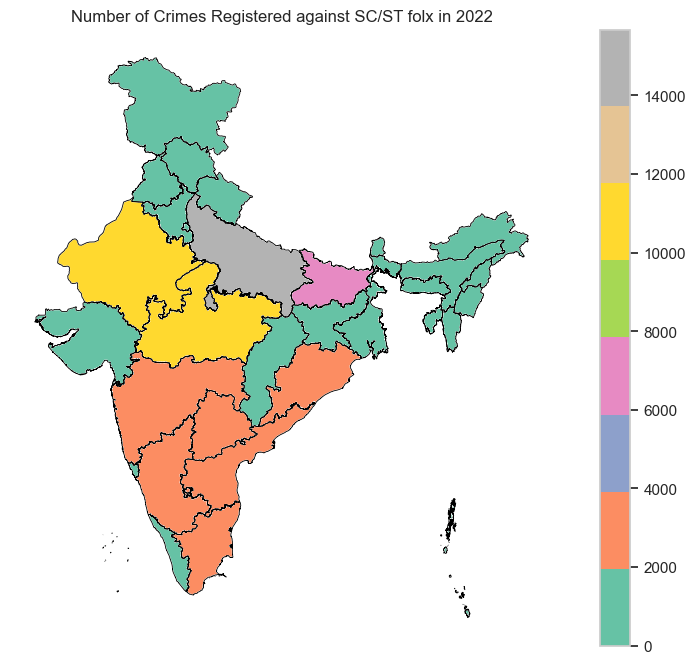

In [59]:
# PLOT MAP

'''
COLOURS:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd',
'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2',
'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn',
'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot',
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis',
'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 
'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 
'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 
'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 
'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 
'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r',
'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
'''
'''
Set2 , Wistia , 
'''

value_column = 'total_cimes'

sns.set(style="whitegrid")  # Set seaborn style
sns.despine()  # Remove spines

# Create a figure and axis object
ax = map_data.boundary.plot(edgecolor="black" , linewidth=0.6 , figsize=(12,8))
map_data.plot(ax=ax, column=value_column , legend="True" , cmap='Set2') # Wistia

# for idx, row in map_data.iterrows():
# 	if row['change'] > 0:
# 	    change = "+" + str(round(row['change'] , 1))
# 	else:
# 	    change = "-" + str(round(row['change'] , 1))

# 	centroid = row.geometry.centroid
# 	ax.annotate(change, xy=(centroid.x, centroid.y), xytext=(0,0), textcoords="offset points", fontsize=9, color='darkred',fontfamily='serif')


# Set plot title and labels
ax.set_title("Number of Crimes Registered against SC/ST folx in 2022")
plt.axis("off")

# Save the plot
plt.savefig('Registered_Crimes_SC_ST_2022.png' , dpi=300 , bbox_inches='tight')
plt.show()